<a href="https://colab.research.google.com/github/26112/COGNIFYZ-TECHNOLOGY-INTERNSHIP-PROJECTS/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 4: Location-Based Restaurant Analysis
Objective: Perform a geographical analysis of the
restaurants in the dataset.

Steps:

1.Explore the latitude and longitude coordinates of
the restaurants and visualize their distribution on a
map.

2.Group the restaurants by city or locality and
analyze the concentration of restaurants in
different areas.

3.Calculate statistics such as the average ratings,
cuisines, or price ranges by city or locality.

4.Identify any interesting insights or patterns related
to the locations of the restaurants.

/tmp/ipython-input-1-2308764339.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')


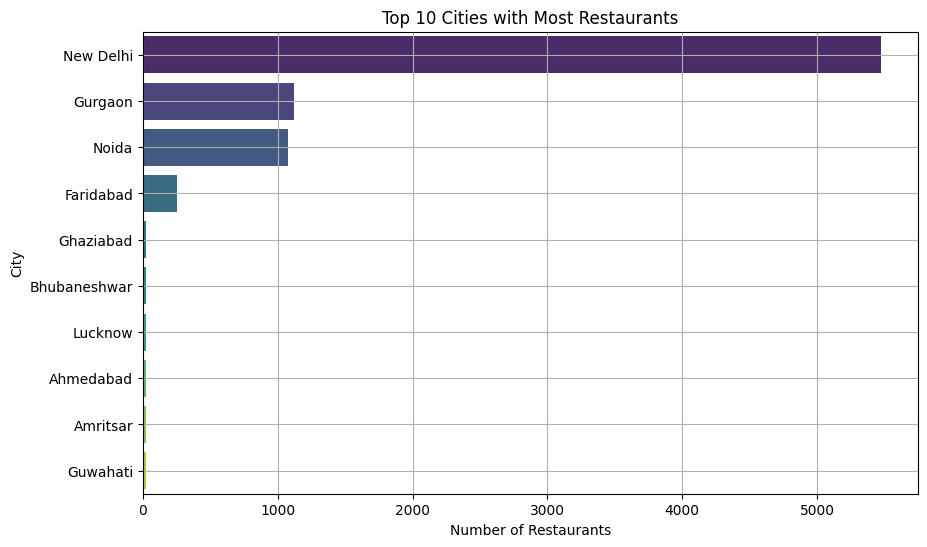

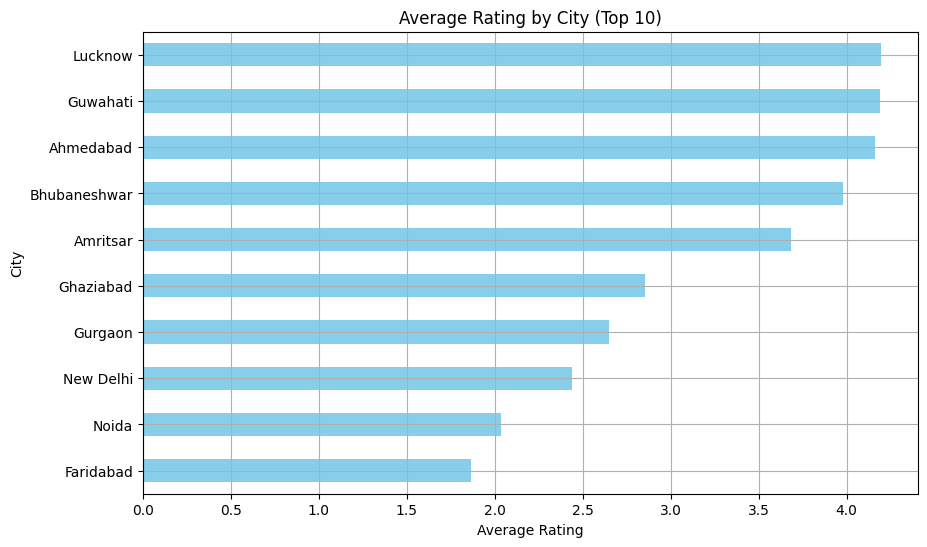

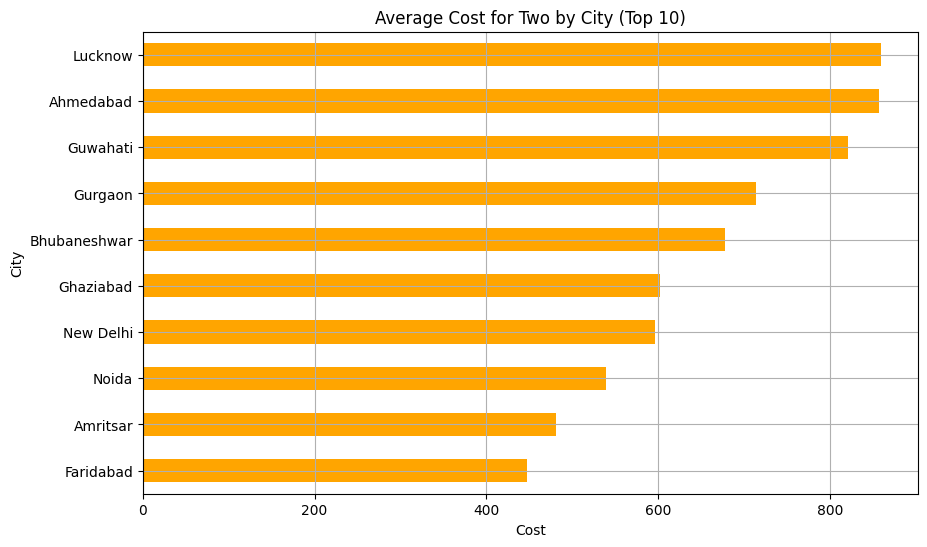

           City   Top Cuisine
0     Ahmedabad   Continental
1      Amritsar  North Indian
2  Bhubaneshwar       Chinese
3     Faridabad  North Indian
4     Ghaziabad  North Indian
5       Gurgaon  North Indian
6      Guwahati          Cafe
7       Lucknow          Cafe
8     New Delhi  North Indian
9         Noida  North Indian

🔹 Top Localities with Highest Rated Restaurants:
                                             Aggregate rating
Locality                                                     
West Park                                                 4.9
Aminabad                                                  4.9
Venetian Village, Al Maqtaa                               4.9
Sofitel Philippine Plaza Manila, Pasay City               4.9
Setor De Clubes Esportivos Sul                            4.9
Taman Impian Jaya Ancol, Ancol                            4.9
The Milk District                                         4.9
Paia                                                      4.9


In [1]:
# 📦 Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

# 📥 Step 2: Load the dataset
df = pd.read_csv("Dataset  (2).csv")

# 🧼 Step 3: Clean dataset
df = df.dropna(subset=['Longitude', 'Latitude', 'City'])  # remove missing geolocations

# 🌍 Step 4: Map distribution of restaurants
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} ({row['City']})"
    ).add_to(marker_cluster)

m.save("restaurant_map.html")  # Open this HTML to view the map

# 📊 Step 5: Restaurants count by city
city_counts = df['City'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.grid(True)
plt.show()

# 📈 Step 6: Average rating by city (top 10 cities)
top_cities = df['City'].value_counts().head(10).index
avg_rating = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values()
plt.figure(figsize=(10,6))
avg_rating.plot(kind='barh', color='skyblue')
plt.title("Average Rating by City (Top 10)")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.grid(True)
plt.show()

# 💰 Step 7: Average cost and price range by city
avg_cost = df[df['City'].isin(top_cities)].groupby('City')['Average Cost for two'].mean().sort_values()
plt.figure(figsize=(10,6))
avg_cost.plot(kind='barh', color='orange')
plt.title("Average Cost for Two by City (Top 10)")
plt.xlabel("Cost")
plt.ylabel("City")
plt.grid(True)
plt.show()

# 🍽️ Step 8: Top cuisines by city
df_cuisines = df[df['City'].isin(top_cities)].groupby('City')['Cuisines'].apply(lambda x: ','.join(x.dropna())).reset_index()
df_cuisines['Top Cuisine'] = df_cuisines['Cuisines'].apply(lambda x: pd.Series(x.split(','))).mode(axis=1)[0]
print(df_cuisines[['City', 'Top Cuisine']])

# 🔍 Step 9: Insights
print("\n🔹 Top Localities with Highest Rated Restaurants:")
print(df.groupby('Locality')[['Aggregate rating']].mean().sort_values(by='Aggregate rating', ascending=False).head(10))

print("\n🔹 Localities with Most Restaurants:")
print(df['Locality'].value_counts().head(10))
